<a href="https://colab.research.google.com/github/leahandofir/cloud-forecasting-transformer/blob/main/DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloud Forecasting Transformer Inference Demo

### Preperations

If you wish to use our example files for the model checkpoint and the input sequence click [here](https://drive.google.com/drive/folders/1y3i3_tcBEAds3qI3i1skWZLrNrXzloKH?usp=sharing) and the files will be shared with your Google Drive. Then create a shortcut to your "MyDrive" directory as illustrated below:

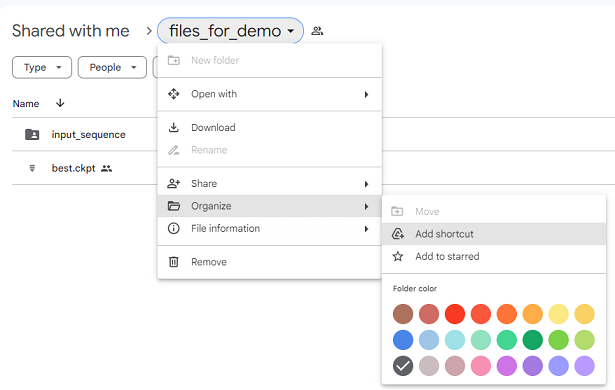

Install the requirements & mount data directory:

In [ ]:
!git clone https://github.com/leahandofir/cloud-forecasting-transformer.git
%cd cloud-forecasting-transformer
!pip install -r inference_requirements.txt
!python3 -m pip install -U -e . --no-build-isolation --extra-index-url --trusted-host

In [ ]:
# In this example our data is located in Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [3]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from datetime import datetime, timedelta
import os

Prepare a pretrained Cloudformer model checkpoint file:

In [4]:
!ls -la /content/drive/MyDrive/files_for_demo/ | grep ckpt

-rw------- 1 root root 159567983 Aug 22 16:55 best.ckpt


Prepare the input sequence:

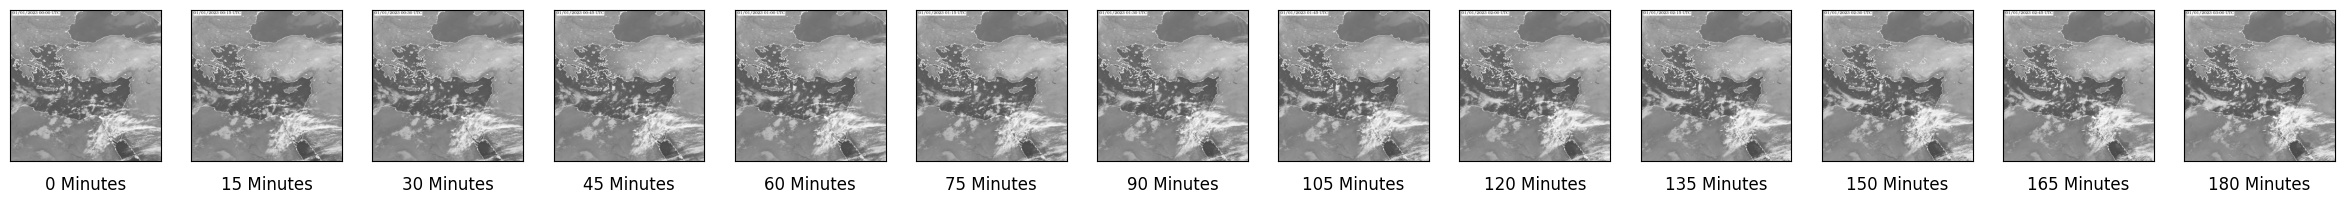

In [5]:
TIME_FORMAT = "%Y%m%d%H%M"
TIME_DELTA = 15
INPUT_SEQUENCE_PATH = '/content/drive/MyDrive/files_for_demo/input_sequence_1'

fig, ax = plt.subplots(nrows=1, ncols=13, squeeze=False, figsize=(30,30))
start_time = datetime.strptime("202301010000", TIME_FORMAT)

for i in range(13):
  image = mpimg.imread(os.path.join(INPUT_SEQUENCE_PATH, f"{datetime.strftime(start_time + i * timedelta(minutes=TIME_DELTA), TIME_FORMAT)}.png"))
  ax[0][i].imshow(image)
  ax[0][i].set_title(f"{i*TIME_DELTA} Minutes", y=-0.25)
  ax[0][i].xaxis.set_ticks([])
  ax[0][i].yaxis.set_ticks([])

plt.show()

### Inference

Execute the inference script:

In [6]:
%%capture
! python scripts/cuboid_transformer/ims/ims_inference.py --ckpt /content/drive/MyDrive/files_for_demo/best.ckpt --data-dir /content/drive/MyDrive/files_for_demo/input_sequence --start-time 202301010000 --cmap gray --plot-stride 2  > /dev/null

View the result:

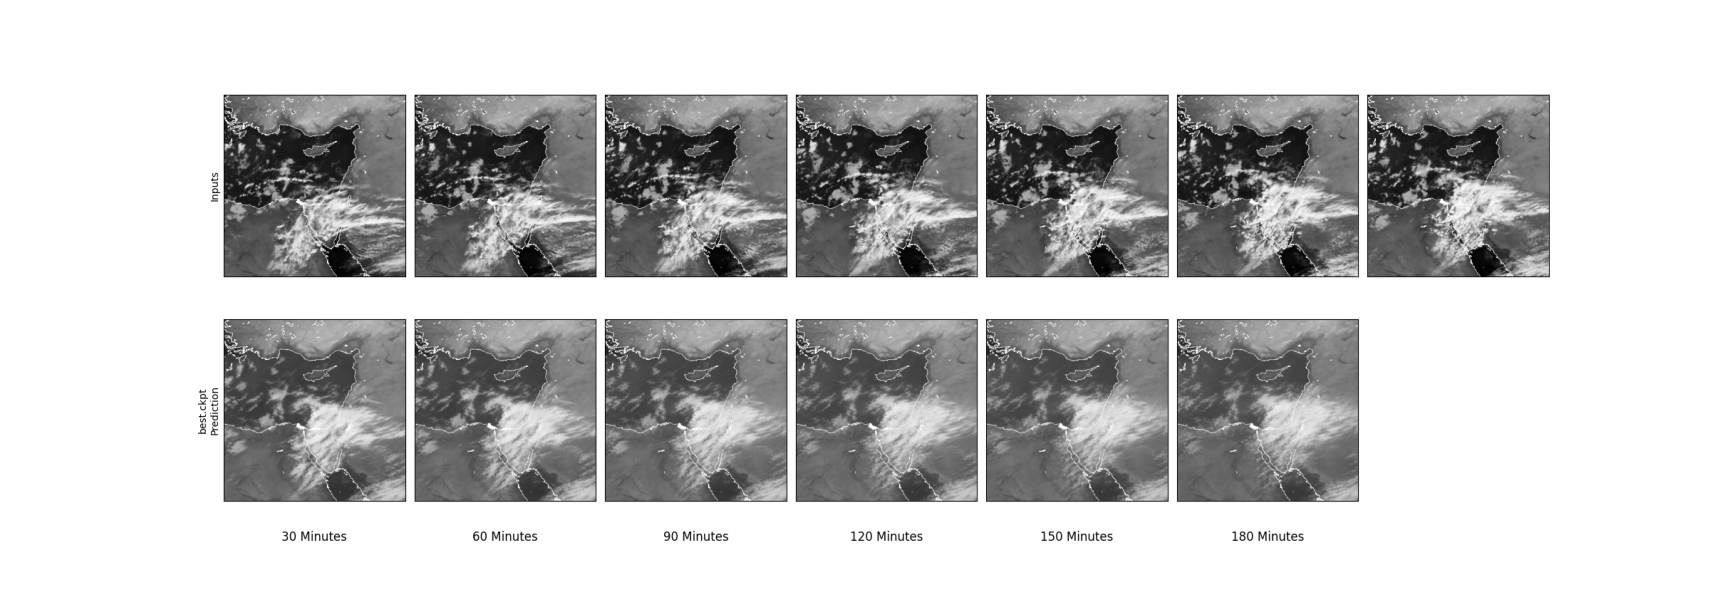

In [7]:
image = mpimg.imread("./prediction_from_202301010000_with_ckpt_best.png")
fig, ax = plt.subplots(figsize=(30, 6))
plt.axis('off')
ax.imshow(image)
plt.tight_layout()

See more sequence examples at /content/drive/MyDrive/files_for_demo.